## kNN(k Nearest Neighbor) k最近傍法

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

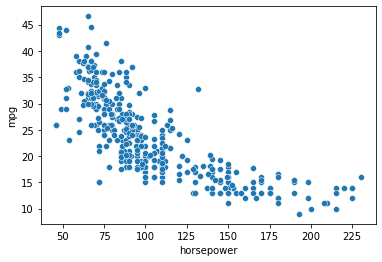

In [1]:
import seaborn as sns
df = sns.load_dataset("mpg") # mile per gallon => meter per literのような、車が単位燃料あたりに進む距離のデータ

# nullをドロップする
df.dropna(inplace=True)
# 馬力（仕事率みたいなもの）から mpg を予測するモデルを立てる
X = df["horsepower"].values.reshape(-1,1)
y = df["mpg"]

# plotを見ると、線形のモデルではなさそうなことが伺える。
sns.scatterplot(x=df["horsepower"], y=df["mpg"])

<AxesSubplot:ylabel='mpg'>

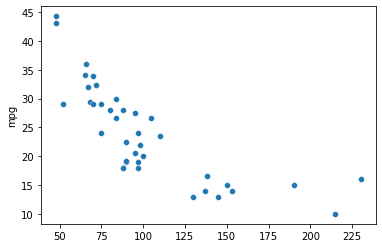

In [9]:
from sklearn.model_selection import train_test_split
# kNNはデータが多いとわかりづらいので、小さな学習サイズで実行してみる
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:, 0], y=y_train) #X_train[:, 0]で、全ての行、0番目の列を取得

In [10]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

Text(0.5, 0, 'horsepower')

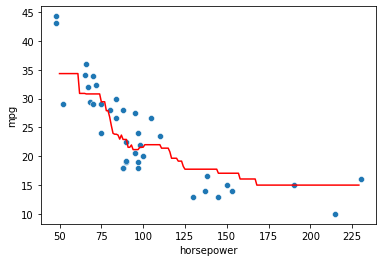

In [14]:
# 結果の描画
import numpy as np
import matplotlib.pyplot as plt

x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train) #X_train[:, 0]で、全ての行、0番目の列を取得
plt.plot(x_axis, y_pred, "r")
plt.xlabel("horsepower")

#### さまざまなkでのkNNの精度を比較しよう
- horsepowerからmpg(mile per gallon)を予測するモデルを作成
    - k = 1~30
- 5-Foldを3回繰り返し、汎化性能を比較
- 評価指標はMSEを採用
- kを増加した時のMSEの推移をplot

In [25]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

k_list = np.arange(1, 31)

k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

score_list = []
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")
    
    score_list.append(-np.mean(scores))
    # results[f"{k} k"] = {"scores_mean": -np.mean(scores), "scores_std": np.std(scores)}
    # print(f"{k} k MSE(3-FoldCV):{-np.mean(scores)}")
    # print(f"{k} k std:{np.std(scores)}")

Best performance: k=13, cv error=18.43521544402385 


Text(0, 0.5, '5fold cv error(MSE)')

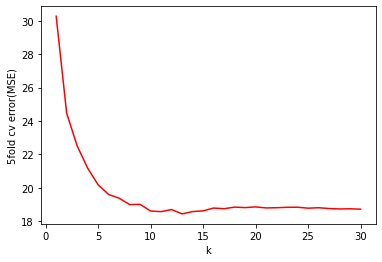

In [28]:
print(f"Best performance: k={k_list[np.argmin(score_list)]}, cv error={np.min(score_list)} ")

plt.plot(k_list, score_list, "r")
plt.xlabel("k")
plt.ylabel("5fold cv error(MSE)")